# SQLite

In [6]:
# SQLite와 Python 연동

import sqlite3

# SQLite 데이터베이스 연결 (파일 생성)
connection = sqlite3.connect('example.db')
print("데이터베이스에 연결되었습니다.")

# 연결 닫기
connection.close()

데이터베이스에 연결되었습니다.


In [9]:
# 테이블 생성
# 1. DB 연결
conn = sqlite3.connect('example.db')
# 2. 데이터 컨트롤 작업
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    age  INTEGER,
    city TEXT
)            
""")
print("테이블이 생성되었습니다.")

# 3. 연결 종료
conn.close()

테이블이 생성되었습니다.


In [10]:
import sqlite3

# 데이터 삽입 : 행단위 입력 => (이름, 나이, 도시)
# insert into users (name, age, city) values ('son', 30, 'london')
connection = sqlite3.connect('example.db')
# 2. 데이터 컨트롤 작업
cursor = connection.cursor()
# 3. 데이터 삽입
cursor.execute("INSERT INTO users (name, age, city) VALUES (?, ?, ?)", ("Alice", 30, "New York"))

# 4. 여러 데이터 삽입
data = [
("Bob", 25, "Los Angeles"),
("Charlie", 35, "Chicago"),
("Diana", 28, "Houston")
]
cursor.executemany("INSERT INTO users (name, age, city) VALUES (?, ?, ?)", data)

# 5. 변경사항 저장
connection.commit()
print("데이터가 삽입되었습니다!")

# 연결 종료
connection.close()


데이터가 삽입되었습니다!


In [15]:
# 데이터베이스 연결
connection = sqlite3.connect("example.db")
cursor = connection.cursor()
# 데이터 조회
cursor.execute("SELECT * FROM users")
rows = cursor.fetchall()
# 조회된 데이터 출력
for row in rows:
    print(row)
# 연결 종료
connection.close()

(1, 'Alice', 31, 'New York')
(3, 'Charlie', 35, 'Chicago')
(4, 'Diana', 28, 'Houston')


In [12]:
# 행을 찾고 -> 해당 행의 컬럼의 값을 지정해서 변경
# update 테이블이름 set 컬럼이름=값, 컬럼이름=값... where 컬럼=값

# 데이터베이스 연결
connection = sqlite3.connect("example.db")
cursor = connection.cursor()
# 데이터 수정
cursor.execute("UPDATE users SET age = ? WHERE name = ?", (31, "Alice"))
# 변경사항 저장
connection.commit()
print("데이터가 수정되었습니다!")
# 연결 종료
connection.close()

데이터가 수정되었습니다!


In [14]:
# 데이터 삭제 => 행단위 삭제

# 데이터베이스 연결
connection = sqlite3.connect("example.db")
cursor = connection.cursor()
# 데이터 삭제
cursor.execute("DELETE FROM users WHERE name = ?", ("Bob",))
# 변경사항 저장
connection.commit()
print("데이터가 삭제되었습니다!")
# 연결 종료
connection.close()

데이터가 삭제되었습니다!


# Matplotlib

### matplotlib은 Python에서 데이터를 시각화하기 위한 가장 기본적인 라이브러리
- 선형 그래프
- 막대 그래프
- 히스토그램과 같은 다양한 형태의 시각화를 쉽게 구현

In [1]:
import matplotlib.pyplot as plt

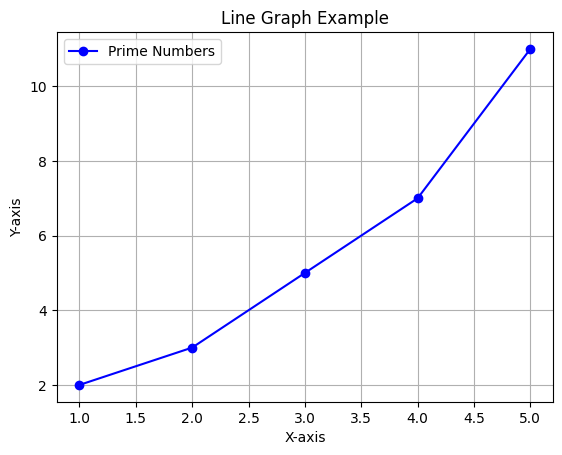

In [2]:
# 선형 그래프

# 데이터 준비
x = [1, 2, 3, 4, 5] # x축 데이터
y = [2, 3, 5, 7, 11] # y축 데이터

# 그래프 생성
plt.plot(x, y, marker='o', linestyle='-', color='b',
label='Prime Numbers')

# 그래프 꾸미기
plt.title("Line Graph Example") # 제목
plt.xlabel("X-axis") # x축 레이블
plt.ylabel("Y-axis") # y축 레이블
plt.legend() # 범례 표시

# 그래프 출력
plt.grid(True) # 격자 추가
plt.show()

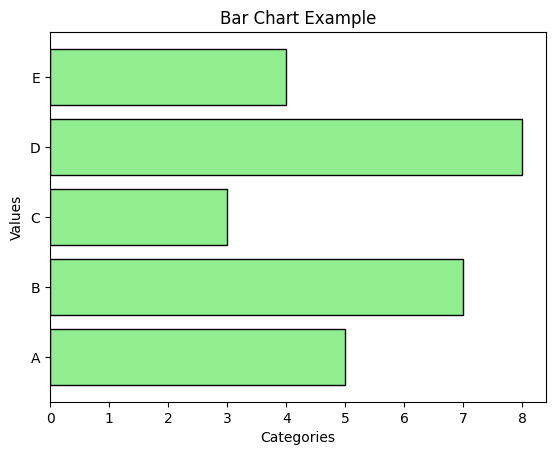

In [3]:
# 막대 그래프

# 데이터 준비
categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 8, 4]

# 막대 그래프 생성
#plt.bar(categories, values, color='skyblue', edgecolor='black')
plt.barh(categories, values, color='lightgreen', edgecolor='black') # 수평 그래프

# 그래프 꾸미기
plt.title("Bar Chart Example") # 제목
plt.xlabel("Categories") # x축 레이블
plt.ylabel("Values") # y축 레이블

# 그래프 출력
plt.show()

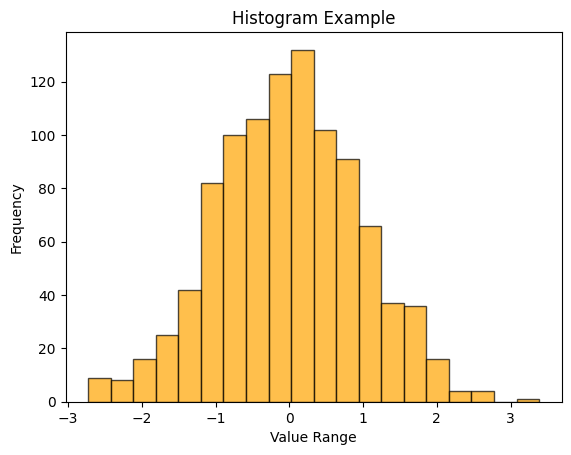

In [4]:
# 히스토그램
import numpy as np

# 데이터 준비
data = np.random.randn(1000)
# 정규분포를 따르는 난수 1000개 생성

# 히스토그램 생성
plt.hist(data, bins=20, color='orange',
edgecolor='black', alpha=0.7)

# 그래프 꾸미기
plt.title("Histogram Example") # 제목
plt.xlabel("Value Range") # x축 레이블
plt.ylabel("Frequency") # y축 레이블

# 그래프 출력
plt.show()

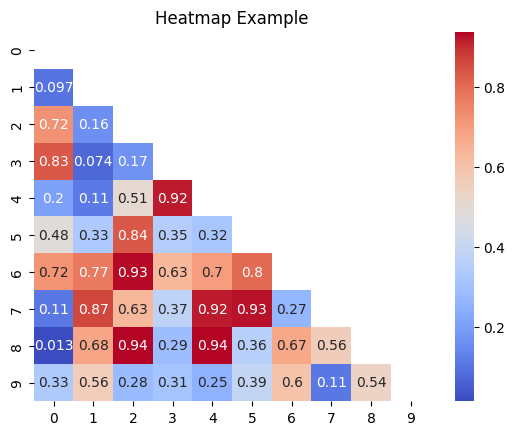

In [5]:
# Seaborn 활용
import seaborn as sns

# 히트맵

# 예제 데이터 생성: 상관관계 행렬
data = np.random.rand(10, 10)
mask = np.triu(np.ones_like(data, dtype=bool)) # 상단삼각형을 마스킹
sns.heatmap(data, annot=True, mask=mask,
cmap='coolwarm')
plt.title("Heatmap Example")
plt.show()


C:\Users\songj\AppData\Local\Temp\ipykernel_16224\65144583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips,


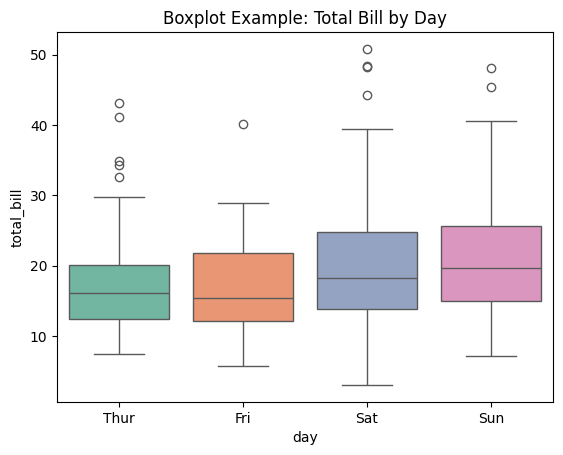

In [6]:
# 박스플롯

# 예제 데이터 생성
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips,
palette="Set2")
plt.title("Boxplot Example: Total Bill by Day")
plt.show()

C:\Users\songj\AppData\Local\Temp\ipykernel_16224\3089497615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="day", y="total_bill", data=tips,


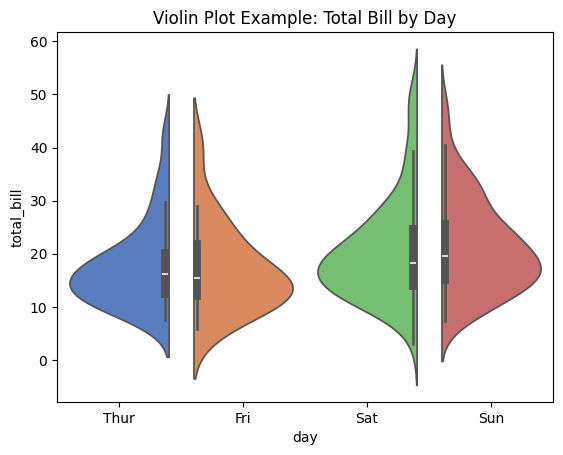

In [7]:
# 바이올린 플롯

# 예제 데이터 생성
tips = sns.load_dataset("tips")
sns.violinplot(x="day", y="total_bill", data=tips,
palette="muted", split=True)
plt.title("Violin Plot Example: Total Bill by Day")
plt.show()

# 데이터 통합 및 조인

In [8]:
# 데이터 통합 및 조인 예제

import pandas as pd

# 고객 정보 데이터프레임
customers = pd.DataFrame({
'customer_id': [1, 2, 3],
'name': ['Alice', 'Bob', 'Charlie']
})

# 주문 정보 데이터프레임
orders = pd.DataFrame({
'order_id': [101, 102, 103],
'customer_id': [1, 2, 4],
'product': ['Laptop', 'Tablet', 'Smartphone']
})

# Inner Join (공통된 customer_id로만 합침)
result_inner = pd.merge(customers, orders, on='customer_id', how='inner')

# Left Join (customers 데이터프레임의 모든 값 유지)
result_left = pd.merge(customers, orders, on='customer_id', how='left')

# 결과 출력
print("Inner Join:\n", result_inner)
print("\nLeft Join:\n", result_left)

Inner Join:
    customer_id   name  order_id product
0            1  Alice       101  Laptop
1            2    Bob       102  Tablet

Left Join:
    customer_id     name  order_id product
0            1    Alice     101.0  Laptop
1            2      Bob     102.0  Tablet
2            3  Charlie       NaN     NaN


In [9]:
# 1월 매출 데이터
sales_jan = pd.DataFrame({
'month': ['January', 'January', 'January'],
'product': ['Laptop', 'Tablet', 'Smartphone'],
'sales': [100, 150, 200]
})
# 2월 매출 데이터
sales_feb = pd.DataFrame({
'month': ['February', 'February', 'February'],
'product': ['Laptop', 'Tablet', 'Smartphone'],
'sales': [120, 160, 220]
})
# Row-wise Concatenation (1월과 2월 데이터를 이어붙임) axis = 0
sales_combined = pd.concat([sales_jan, sales_feb], axis=0)
# 결과 출력
print(sales_combined)

      month     product  sales
0   January      Laptop    100
1   January      Tablet    150
2   January  Smartphone    200
0  February      Laptop    120
1  February      Tablet    160
2  February  Smartphone    220


# 데이터 분포 확인(히스토그램, 박스플롯)

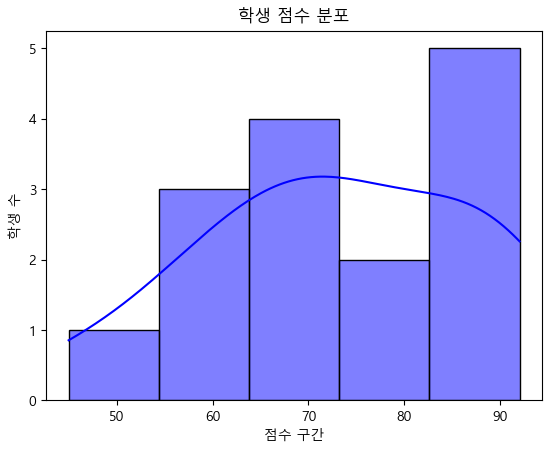

In [9]:
# 히스토그램 예제 : 학생들의 시험 점수 분포
import seaborn as sns
import matplotlib.pyplot as plt

# 학생 점수 데이터
scores = [56, 67, 45, 89, 90, 77, 68, 88, 92, 76, 58, 70, 73,
85, 62]
# Seaborn 히스토그램 생성
plt.rc('font', family='Malgun Gothic') # For Windows
sns.histplot(scores, bins=5, kde=True, color='blue',
edgecolor='black')
# kde=True는 밀도곡선 추가
# bins=5 5개 구간으로 구분
plt.title("학생 점수 분포")
plt.xlabel("점수 구간")
plt.ylabel("학생 수")
plt.show()

C:\Users\songj\AppData\Local\Temp\ipykernel_15432\2450204669.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salaries, labels=departments)


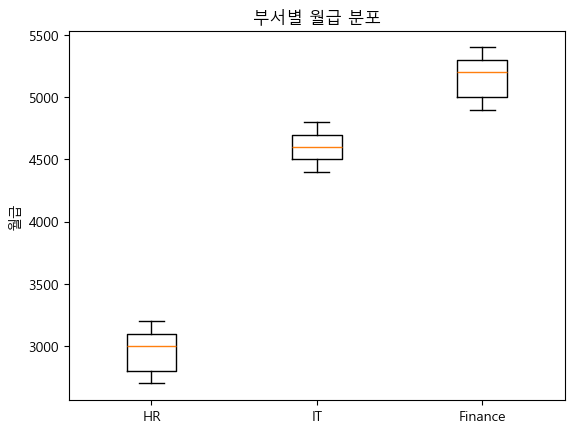

In [11]:
# 박스플롯 예제

# 데이터 변환: Seaborn은 Long Format 데이터가 필요

# 부서별 월급 데이터
departments = ['HR', 'IT', 'Finance']
salaries = [
[3000, 3200, 3100, 2800, 2700], # HR
[4500, 4600, 4700, 4400, 4800], # IT
[5200, 5300, 5000, 4900, 5400] # Finance
]

# 박스플롯 생성
plt.rc('font', family='Malgun Gothic') # For Windows
plt.boxplot(salaries, labels=departments)
plt.title("부서별 월급 분포")
plt.ylabel("월급")
plt.show()

# 데이터 탐색적 분석(EDA)을 위한 시각화 기법

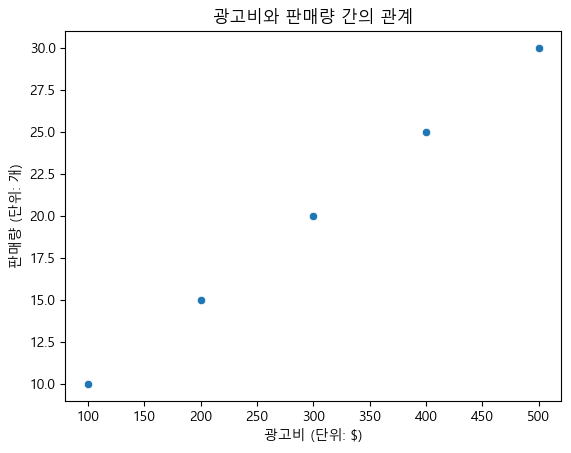

In [12]:
# 산점도 예제

# 데이터
import pandas as pd
data = pd.DataFrame({
'Ad_Spend': [100, 200, 300, 400, 500],
'Sales': [10, 15, 20, 25, 30]
})
plt.rc('font', family='Malgun Gothic') # For Windows
# 산점도 생성
sns.scatterplot(x='Ad_Spend', y='Sales', data=data)
plt.title("광고비와 판매량 간의 관계")
plt.xlabel("광고비 (단위: $)")
plt.ylabel("판매량 (단위: 개)")
plt.show()

In [2]:
import matplotlib as mpl

In [3]:
print(mpl.matplotlib_fname())

c:\Python313\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [4]:
print(mpl.get_cachedir())

C:\Users\songj\.matplotlib


In [13]:
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

['Malgun Gothic']
10.0


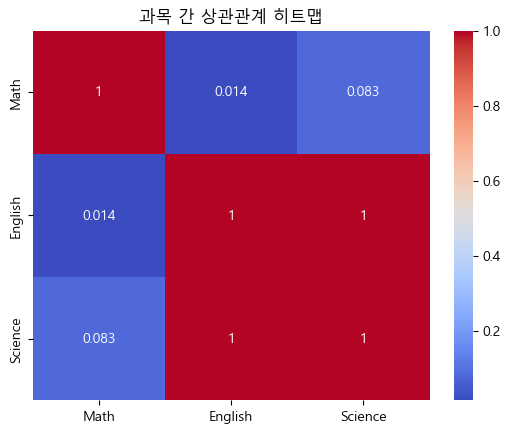

In [14]:
# 히트맵 예제

# 데이터 생성
data = pd.DataFrame({
'Math': [90, 80, 70, 60, 85],
'English': [85, 75, 65, 55, 10],
'Science': [88, 78, 68, 58, 23]
})
# 상관계수 계산
correlation = data.corr()
plt.rc('font', family='Malgun Gothic') # For Windows
# 히트맵 생성
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("과목 간 상관관계 히트맵")
plt.show()

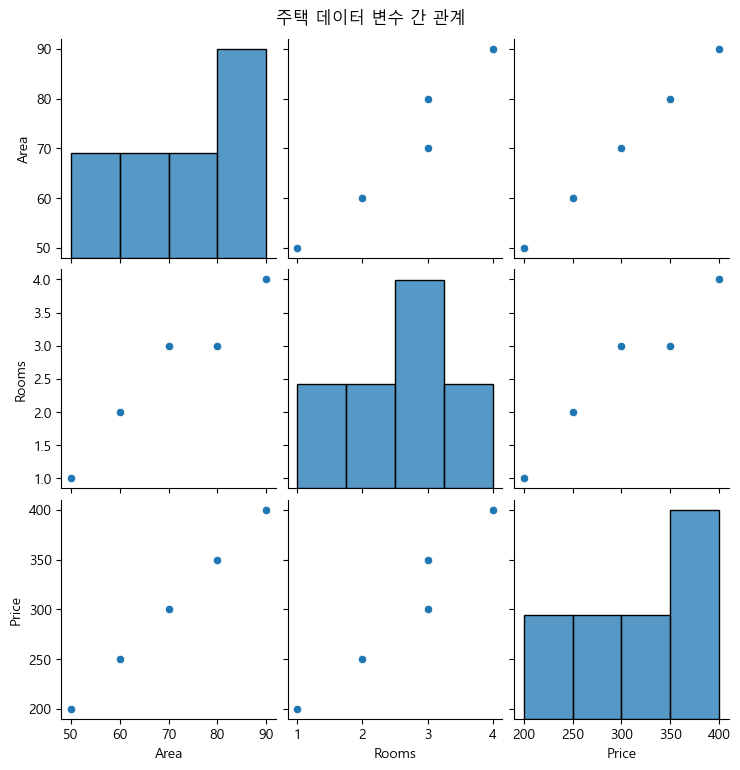

In [15]:
# 페어 플롯 예제

# 데이터
data = pd.DataFrame({
'Area': [50, 60, 70, 80, 90],
'Rooms': [1, 2, 3, 3, 4],
'Price': [200, 250, 300, 350, 400]
})
# 페어플롯 생성
sns.pairplot(data)
plt.suptitle("주택 데이터 변수 간 관계", y=1.02)
plt.show()

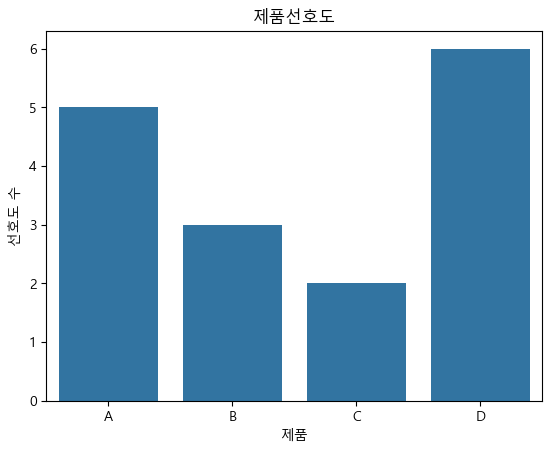

In [2]:
# 카운트 플롯 예제
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 데이터
data = pd.DataFrame({
'Product' : ['A', 'B', 'A', 'C', 'B', 'A', 'B', 'C', 'A', 'A',
             'D','D','D','D','D','D']
})
# 카운트플롯 생성
plt.rc('font', family='Malgun Gothic')
sns.countplot(x='Product', data=data)
plt.title('제품선호도')
plt.xlabel('제품')
plt.ylabel('선호도 수')
plt.show()